# 1. CNN
CNN(Convolutional Neural Network, 합성곱 신경망)은 주로 이미지나 비정형 데이터의 패턴을 학습하고 분석하는 데 사용되는 딥러닝 모델입니다.  
 CNN은 이미지의 공간적 구조를 효율적으로 처리하기 위해 합성곱 계층(convolutional layer)을 사용하며, 이 계층은 필터(커널)를 통해 입력 데이터에서 중요한 특징(에지, 모양 등)을 추출합니다.  
  이어서 풀링 계층(pooling layer)을 통해 차원을 축소하고 계산 효율을 높이며, 마지막으로 완전 연결 계층(fully connected layer)을 사용해 특정 클래스나 값을 예측합니다.   
  CNN은 이미지 분류, 객체 탐지, 영상 처리 등 다양한 분야에서 높은 성능을 발휘하며, 이미지의 공간적 관계를 보존하면서 학습할 수 있다는 점에서 강점을 가집니다.

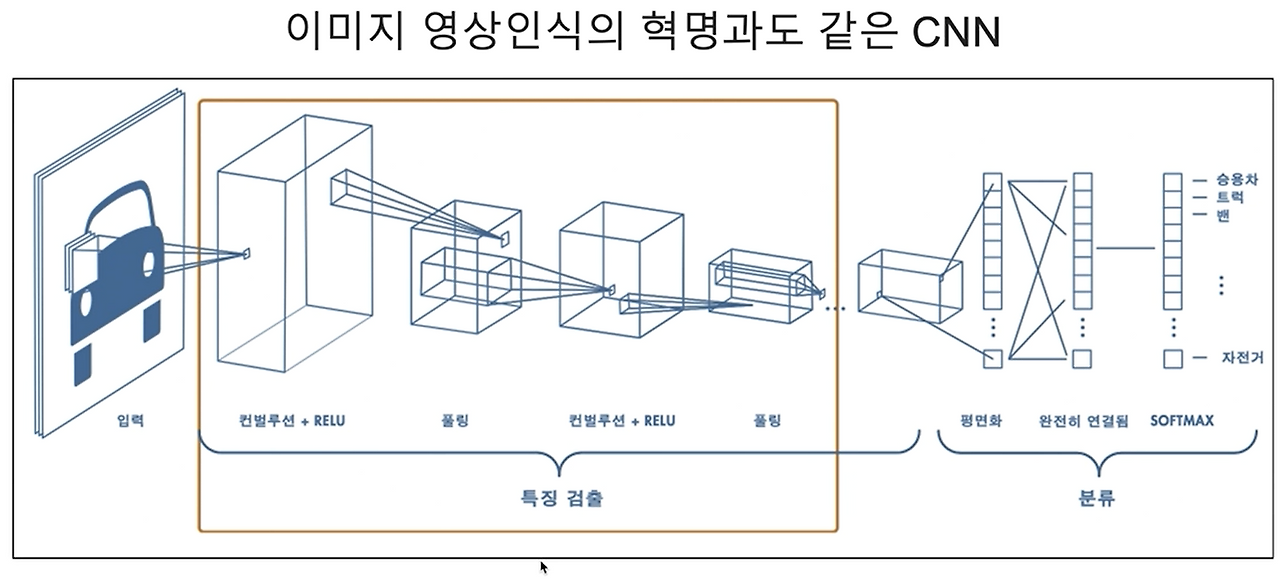

이미지를 flatten 시키는 게 아니라 그대로 x, y 축을 살려서 집어 넣음.
숫자를 압축해보면서 이해를 하고,   
최댓값을 추출해보면서 이해를 하고,   
여러가지 방법을 통해 이해하면서 압축하면서 맵을 만들어내게 됨.   
그걸 가지고 펼쳐요.  
정답과 비교를 해요. 처음부터 정답과 맞을 수는 없으니까 계속 비교한다.

### ※ 영상처리에서 CNN을 사용하는 이유

영상처리에서 CNN을 사용하는 이유는 이미지를 분석하는 데 더 적합한 구조를 가지고 있기 때문입니다. CNN은 작은 필터를 사용해 이미지에서 중요한 특징(예: 선, 모양 등)을 효율적으로 추출하며, 이를 반복적으로 사용해 학습해야 할 양을 줄입니다. 또한, 이미지가 조금 이동하거나 변형되어도 특징을 잘 인식할 수 있고, 간단한 요소에서 복잡한 패턴까지 단계적으로 분석할 수 있어 DNN보다 더 적합합니다. DNN은 모든 픽셀을 개별적으로 학습하려 하기 때문에 계산이 복잡하고 이미지의 공간적 구조를 잘 반영하지 못합니다.



# 2. 입력 이미지
컴퓨터가 이미지를 인식하는 과정은 이미지를 숫자로 표현하는 것에서 시작됩니다. 이미지는 픽셀 값(흑백 이미지는 밝기를 0~255 사이 숫자로, 컬러 이미지는 RGB 채널 값으로)을 가진 행렬로 변환되며, 이 숫자 데이터를 기반으로 컴퓨터가 계산을 수행합니다.

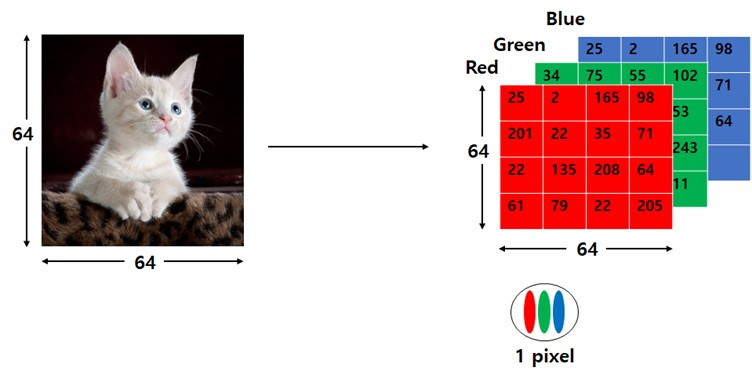

# **3. 합성곱 계층**
- 합성곱 계층(Convolution Layer)는 CNN(Convolutional Neural Network)의 핵심 구성 요소로, 이미지에서 중요한 특징을 추출하는 역할을 합니다.
- 이 계층은 작은 크기의 필터(커널)를 사용해 입력 데이터(이미지)의 일부분과 합성곱 연산을 수행하며,
- 필터는 특정 패턴(예: 가장자리, 텍스처 등)을 감지하도록 학습됩니다.
    - 필터는 이미지를 스캔하며 각 위치에서 특징 맵(feature map)을 생성하는데, 이는 이미지의 중요한 정보를 강조한 새로운 데이터 표현입니다.
- Convolution Layer는 이미지의 공간적 구조를 보존하면서 효율적으로 특징을 추출하고,
- 이를 다음 계층으로 전달해 점점 더 복잡한 패턴을 학습할 수 있게 합니다.

### 1. 합성곱 연산

합성곱 연산(Convolution Operation)은 합성곱 계층에서 입력 데이터(예: 이미지)와 필터(커널)를 사용해 특징을 추출하는 기본 과정입니다.
- 이 연산은 필터를 이미지 위에서 일정한 크기만큼 이동하며,
- 필터와 해당 영역의 픽셀 값을 element-wise 곱한 뒤 합산하여 하나의 값을 생성합니다.
- 이 과정으로 생성된 값들이 모여 새로운 특징 맵(feature map)을 만듭니다.
- 필터는 학습 과정에서 업데이트되며, 특정 패턴(예: 가장자리, 선, 질감 등)을 감지할 수 있도록 조정됩니다.
- 합성곱 연산은 이미지의 공간적 관계를 보존하면서도 중요한 정보를 강조하고,
- 불필요한 정보를 줄이는 데 매우 효과적입니다.


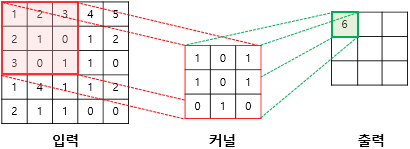  
(1×1) + (2×0) + (3×1) + (2×1) + (1×0) + (0×1) + (3×0) + (0×1) + (1×0) = 6  
- 이미지의 원래 크기보다 작아질 수 밖에 없다. 크기를 줄여가면서 이미지를 이해할 수 있고, 계산량을 줄일 수 있다.  
- 이미지를 압축해가면서 알아가는 구조라고 생각하면 됨.

### 2. 스트라이드

스트라이드(Stride)는 합성곱 연산에서 필터(커널)가 입력 데이터(이미지) 위를 이동하는 간격을 의미합니다.
- 기본적으로 스트라이드 값이 1이면 필터가 한 칸씩 움직이며 모든 위치에서 연산을 수행합니다.
- 스트라이드 값이 2 이상이면 필터가 더 큰 간격으로 이동하므로,
- 생성되는 출력 크기가 작아지고 연산량도 줄어듭니다.
- 스트라이드를 조절하면 특징 맵의 크기를 조정할 수 있어,
- 모델의 계산 효율성을 높이거나 더 큰 영역의 정보를 한 번에 처리할 수 있습니다.
- 다만, 스트라이드가 너무 크면 중요한 세부 정보가 손실될 수 있으므로 적절한 값을 선택하는 것이 중요합니다.

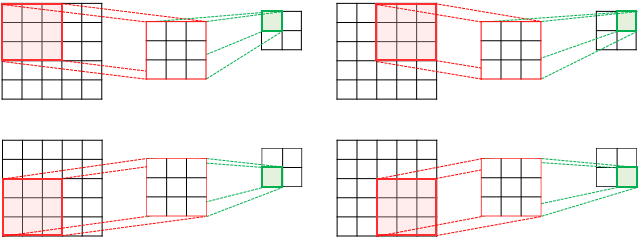  
stride = 2

### 3. 패딩

패딩(Padding)은 합성곱 연산에서 입력 데이터(이미지)의 가장자리에 값을 추가하여 출력 크기를 조정하거나 경계 부분의 정보 손실을 방지하는 기법입니다.
- 좀 더 이미지를 깊게 알아보고 싶다면 패딩을 쓰세요.
- 함축적인 정보만 중요하다면 패딩 안써도 됨.
- 일반적으로 가장자리에 0을 추가하는 제로 패딩(Zero Padding)이 많이 사용됩니다.  

- 패딩은 두 가지 주요 목적이 있습니다
1.  첫째, 입력 데이터 크기를 유지하여 출력 크기를 줄이지 않고 처리할 수 있게 하며(예: "same" 패딩),
2.  둘째, 경계 부분의 정보를 더 많이 학습할 수 있게 합니다. 패딩을 사용하지 않으면("valid" 패딩) 합성곱 연산이 진행될수록 데이터 크기가 줄어드는 문제가 발생할 수 있습니다.  
이를 통해 모델이 공간 정보를 더 잘 학습할 수 있도록 돕습니다.

### 4. 풀링

풀링(Pooling)은 CNN에서 특징 맵의 크기를 줄이고, 중요한 정보를 요약하여 계산 효율성을 높이는 과정입니다.
- 주로 사용되는 방법은 최대 풀링(Max Pooling)과 평균 풀링(Average Pooling)으로,
- 최대 풀링은 작은 영역에서 가장 큰 값을 선택해 주요 특징을 강조하고,
- 평균 풀링은 영역의 평균값을 계산하여 전체적인 정보를 요약합니다.
- 풀링은 데이터 크기를 줄이면서도 중요한 특징을 유지하고,
- 모델이 공간적 위치 변화에 덜 민감해지도록 만들어 일반화 성능을 높입니다.
- 이를 통해 연산량을 줄이고 과적합(overfitting)을 방지하는 데 도움을 줍니다.

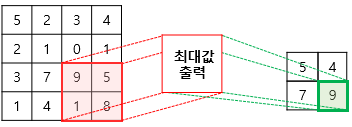  
Max Pooling

# 4. DNN과 CNN

### 1. DNN의 가중치와 편향



- DNN은 완전 연결 계층(fully connected layer)으로 구성되어 있어, 각 입력 노드가 모든 출력 노드와 연결됩니다.
- 이 때문에 입력 노드의 수와 출력 노드의 수에 비례하여 매우 많은 가중치(weight)가 필요합니다.
- 각 연결마다 고유한 가중치를 학습하므로, 같은 값이라도 위치가 다르면 별도의 가중치를 사용합니다.
- 모든 노드에 대해 별도로 편향(bias)이 존재하며, 가중치와 함께 학습됩니다.

### 2. CNN의 가중치와 편향

- CNN의 합성곱 계층은 작은 크기의 필터(커널)를 사용하여 입력 데이터의 특정 영역만을 처리합니다.
- 필터는 여러 위치에서 동일하게 적용되며, 이를 **가중치 공유(weight sharing)**라고 합니다.
- 즉, 필터에 사용되는 가중치는 입력 데이터의 모든 영역에서 반복적으로 사용되므로, 학습해야 할 가중치 수가 크게 줄어듭니다.
- 각 필터마다 하나의 편향(bias)이 있으며, 필터가 어디에 적용되든 동일하게 사용됩니다.
- 합성곱 신경망에도 편향(bias)을 추가할 수 있습니다. 만약, 편향을 사용한다면 커널을 적용한 뒤에 더해집니다.
-  편향은 하나의 값만 존재하며, 커널이 적용된 결과의 모든 원소에 더해집니다.

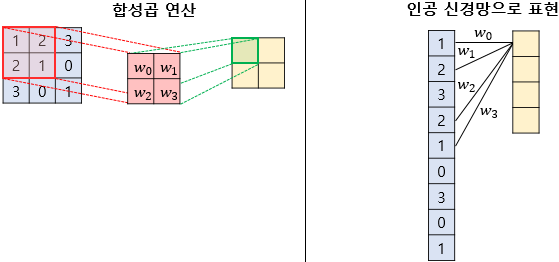 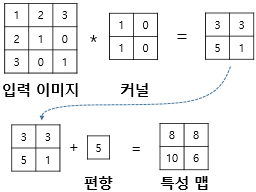

# 5. 다수의 채널 합성곱 연산

다수의 채널을 가진 경우(예: 컬러 이미지는 3개의 채널, RGB로 구성됨), 합성곱 연산은 각 채널별로 개별적으로 진행된 후 합산되어 최종적인 결과를 도출합니다.

- 필터의 각 채널과 입력 이미지의 대응 채널에 대해 합성곱 연산을 수행합니다. (예를 들어, 필터의 R 채널 부분과 이미지의 R 채널 부분에서 합성곱 연산을 수행합니다. 동일하게 G 채널과 B 채널에서도 각각 수행됩니다.)
- 각 채널에서 나온 합성곱 결과를 더해서 최종 값 하나를 만듭니다.
- 필터는 설정된 스트라이드에 따라 이미지 위를 이동하며 위 과정을 반복합니다. 최종적으로 각 위치에서 계산된 결과값들이 모여 하나의 출력 채널(feature map)을 형성합니다.

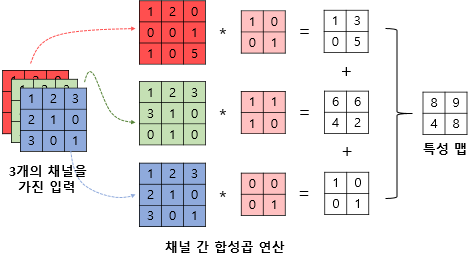

# 6. CNN을 구성하는 레이어

CNN은 주로 다음과 같은 레이어로 구성되며, 이미지를 단계적으로 처리해서 결과를 예측합니다. [(CNN 체험하기)]('https://adamharley.com/nn_vis/')

- 입력 레이어
    - 이미지를 숫자 행렬(예: 32×32×3, RGB 채널)로 네트워크에 전달합니다.
- 합성곱 레이어(Convolution Layer)
    - 작은 필터(예: 3×3)를 사용해 이미지의 중요한 특징(예: 선, 모양 등)을 찾아냅니다.
    - 필터를 여러 개 사용해 여러 가지 특징을 추출합니다.
- 활성화 함수(ReLU)
    - 음수 값을 0으로 바꿔 비선형성을 추가하고, 모델이 복잡한 패턴을 학습할 수 있도록 돕습니다.
- 풀링 레이어(Pooling Layer)
    - 이미지 크기를 줄이고 중요한 정보만 요약합니다.
    - 예: 2×2풀링은 4개의 값 중 가장 큰 값을 선택(Max Pooling).
- 완전 연결 계층(Fully Connected Layer)
    - 이미지의 모든 특징을 하나의 벡터로 평평하게 펼쳐 최종 클래스를 예측합니다.
    - 예: 10개의 클래스(고양이, 개 등)에 대해 확률을 계산합니다.
- 출력 레이어(Output Layer)
    - 소프트맥스(Softmax) 같은 함수를 사용해 각 클래스에 대한 확률을 출력합니다.

# 7. 간단한 CNN 모델 만들기

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

In [7]:
# 배치크기 * 채널(1: 그레이스케일, 3: 컬러) * 너비 * 높이
inputs = torch.Tensor(1, 1, 28, 28) # 그레이 이미지 1개를 받겠다 라는 뜻
print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [8]:
# 첫 번째 Conv2D + ReLU
conv1 = nn.Sequential(
    # 1개 넣어서 32개 출력하겠다. 필터크기 3x3짜리, 내보낼 때 피처맵을 동일한 크기로 만들겠다.
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding='same'),
    nn.ReLU()  # 활성화 함수 추가 (비선형) # 비선형인 이유는 너무 당연하다. 여러 개로 내보내기 때문에 비선형을 만들어야 함.
)
out = conv1(inputs) # 이미지 1개를 집어 넣은 것
print(out.shape) # torch.Size([1, 32, 28, 28])

# 첫 번째 MaxPool2D (중요 정보만 뽑기 위함)
pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # stride 기본값 = 2
out = pool1(out) # 반으로 줄였다. = stride가 2인 것.
print(out.shape) # torch.Size([1, 32, 14, 14])

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])


In [9]:
# 두 번째 Conv2D + ReLU
conv2 = nn.Sequential(
    # 첫 번째에서 온 걸 받아야함. 피처를 늘려보도록 할게요. 이미지는 작아지고, 더 늘려보자.
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding='same'),
    nn.ReLU()  # 활성화 함수 추가
)
out = conv2(out) # 1에서 나온 out 집어 넣기
print(out.shape) # torch.Size([1, 64, 14, 14])

# 두 번째 MaxPool2D
pool2 = nn.MaxPool2d(kernel_size=2)
out = pool2(out)
print(out.shape) # torch.Size([1, 64, 7, 7])

torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])


In [10]:
# Flatten (딥러닝으로 넘기기 위해선 flatten 평탄화 시켜야함)
flatten = nn.Flatten()
out = flatten(out)
print(out.shape)  # 64 * 7 * 7 = 3136

fc = nn.Sequential(
    nn.Dropout(0.5),  # 드롭아웃 추가 (50% 확률로 뉴런 비활성화)
    nn.Linear(3136, 10) #3136개 받아서 10개로 내보내주겠다!
)
out = fc(out)
print(out.shape)

torch.Size([1, 3136])
torch.Size([1, 10])
